In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import os

In [3]:
os.chdir("/Users/shree/Desktop/MLP")

In [4]:
bankData= pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [5]:
bankData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#to get the shape (no. of rows and coloumns) of dataset
bankData.shape

(614, 13)

In [7]:
bankData.size

7982

In [8]:
#to get data types and non null values in each column
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
bankData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
bankData.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
bankData.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
bankData.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
bankData.dropna(axis=0, inplace= True)

In [14]:
bankData.drop(['Loan_ID'], axis=1, inplace=True)

In [15]:
bankData.shape

(480, 12)

In [16]:
bankData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
#as we are predicting if we should provide loan or not, 
#Loan_Status is our target variable

#X is training data
#Y is testing data

X = bankData.drop(['Loan_Status'], axis=1)
Y = bankData['Loan_Status']

xTrain, xTest,yTrain, yTest = train_test_split(
                                                X,Y,
                                                test_size=0.3,
                                                random_state=1)


In [18]:
num =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',  'Loan_Amount_Term']
cat = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

# KNN classification

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
xTrain[cat] = xTrain[cat].apply(le.fit_transform)

/Users/shree/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
xTrain[cat].head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
52,0,0,0,0,0,1,1
439,0,1,0,1,1,1,0
276,1,1,0,0,0,1,1
438,1,0,0,0,1,0,2
208,1,0,0,0,0,1,2


In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(xTrain[num])

array([[-0.21848915, -0.59611605, -0.43130655,  0.27219883],
       [ 0.24953542, -0.59611605, -0.10956682,  0.27219883],
       [-0.25658043,  0.71771761,  0.74428094,  0.27219883],
       ...,
       [ 1.23315848, -0.59611605, -1.32227812,  0.27219883],
       [-0.14841404, -0.59611605, -0.14669063,  0.27219883],
       [-0.58847286,  0.06360983, -0.57980181,  0.27219883]])

In [22]:
i = xTrain[cat]
j = ss.transform(xTrain[num])

xtr = np.hstack([i,j])
xtr.shape

(336, 11)

In [23]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(xtr, yTrain)

KNeighborsClassifier(metric='euclidean')

In [24]:
xTest[cat] = xTest[cat].apply(le.fit_transform)

/Users/shree/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
a = xTest[cat]
b = ss.transform(xTest[num])

xts = np.hstack([a,b])
xts.shape

(144, 11)

In [26]:
yPred = knn.predict(xts)

In [27]:
confusion_matrix(yTest, yPred)

array([[10, 41],
       [ 7, 86]])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, yPred)

0.6666666666666666

In [29]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(yTest, yPred)

(array([0.58823529, 0.67716535]),
 array([0.19607843, 0.92473118]),
 array([0.29411765, 0.78181818]),
 array([51, 93]))

In [30]:
from sklearn.metrics import precision_score
precision_score(yTest, yPred, pos_label='Y')

0.6771653543307087

In [31]:
from sklearn.metrics import recall_score
recall_score(yTest, yPred, pos_label='Y')

0.9247311827956989

In [32]:
from sklearn.metrics import f1_score
f1_score(yTest, yPred, pos_label='Y')

0.7818181818181819

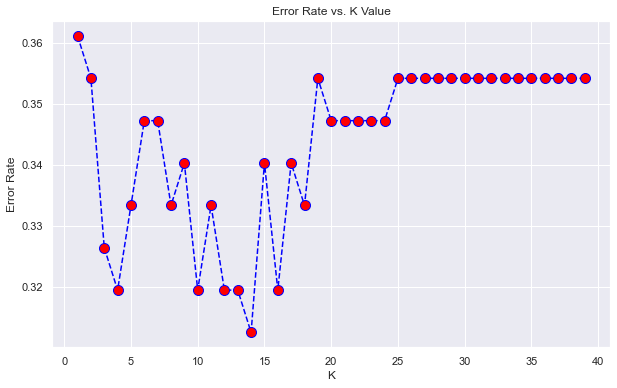

Minimum error:- 0.3125 at K = 14


In [33]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtr,yTrain)
    pred_i = knn.predict(xts)
    error_rate.append(1-accuracy_score(yTest, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [34]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(xtr, yTrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [35]:
yPred = knn.predict(xts)

In [36]:
accuracy_score(yTest, yPred)

0.6805555555555556

# Decision Tree

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
bankData.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
X= bankData.drop(['Loan_Status'], axis=1)
y= bankData['Loan_Status']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
X_train[cat] = X_train[cat].apply(LabelEncoder().fit_transform)

/Users/shree/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [41]:
ss = StandardScaler()
ss.fit_transform(X_train[num])

array([[-0.21848915, -0.59611605, -0.43130655,  0.27219883],
       [ 0.24953542, -0.59611605, -0.10956682,  0.27219883],
       [-0.25658043,  0.71771761,  0.74428094,  0.27219883],
       ...,
       [ 1.23315848, -0.59611605, -1.32227812,  0.27219883],
       [-0.14841404, -0.59611605, -0.14669063,  0.27219883],
       [-0.58847286,  0.06360983, -0.57980181,  0.27219883]])

In [42]:
a = X_train[cat]
b = ss.transform(X_train[num])

Xtr = np.hstack([a,b])
Xtr.shape

(336, 11)

In [43]:
ss = StandardScaler()
ss.fit_transform(X_test[num])
le = LabelEncoder()
X_test[cat] = X_test[cat].apply(le.fit_transform)
a1 = X_test[cat]
b1 = ss.transform(X_test[num])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[-4.40370710e-01, -6.28785926e-01, -8.67535588e-01,
         1.95068347e+00],
       [ 3.42682579e-01, -6.28785926e-01, -8.56500913e-02,
         2.84619297e-01],
       [ 2.44396577e-01, -6.28785926e-01,  5.30715290e-02,
         2.84619297e-01],
       [ 3.35769901e+00, -6.28785926e-01,  4.54260760e+00,
         2.84619297e-01],
       [-3.74680825e-01,  5.03895678e-01,  2.29626318e-01,
         2.84619297e-01],
       [ 2.88936310e-01, -6.28785926e-01,  2.62730342e-03,
         2.84619297e-01],
       [-2.85601359e-01, -6.28785926e-01, -3.75704388e-01,
         2.84619297e-01],
       [-2.11700239e-01, -6.28785926e-01, -1.13236777e+00,
        -1.38144488e+00],
       [ 1.28423760e+00, -6.28785926e-01,  1.91793149e-01,
         2.84619297e-01],
       [-7.56130044e-01, -2.06034300e-01, -1.17020094e+00,
         2.84619297e-01],
       [-6.74017687e-01,  1.69443117e+00, -8.80146644e-01,
        -2.21447697e+00],
       [-1.07193603e-01, -6.28785926e-01, -2.49593824e-01,
      

/Users/shree/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(144, 11)

In [44]:
from sklearn.tree import DecisionTreeClassifier as dtree
dt = dtree(
           criterion="entropy",   
           max_depth=None       
                             
           )

_=dt.fit(X_train,y_train)

In [45]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
y_pred = dt.predict(Xtr1)

In [47]:
np.sum((y_test == y_pred))/y_test.size

0.3541666666666667

In [48]:
bankData.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [49]:
bankData['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

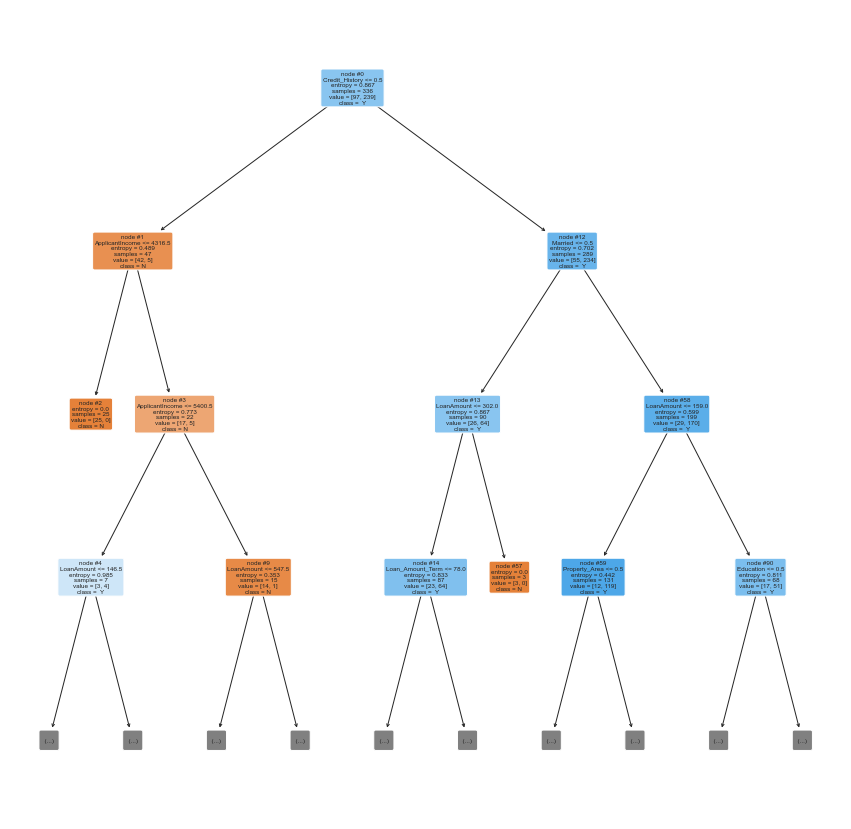

In [50]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'],
            class_names = ['N',' Y']
            )

_=plt.show()

# Random Forest

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [52]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7569444444444444


In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[23, 28],
       [ 7, 86]])

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
bankData.feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'],
bankData.target_names = bankData['Loan_Status']

<ipython-input-55-d5f6b24cb684>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bankData.feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
<ipython-input-55-d5f6b24cb684>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bankData.target_names = bankData['Loan_Status']


In [56]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

9     0.240180
7     0.202645
5     0.187916
6     0.114790
10    0.058824
2     0.050607
8     0.049704
1     0.032924
3     0.025052
4     0.018789
0     0.018569
dtype: float64

In [57]:
list(zip(bankData.columns, feature_imp))

[('Gender', 0.24018007040259717),
 ('Married', 0.20264457604908626),
 ('Dependents', 0.18791617564299884),
 ('Education', 0.1147898428341007),
 ('Self_Employed', 0.05882420879182632),
 ('ApplicantIncome', 0.05060740120781282),
 ('CoapplicantIncome', 0.04970424829266791),
 ('LoanAmount', 0.032924093794525836),
 ('Loan_Amount_Term', 0.0250516140367058),
 ('Credit_History', 0.018789241551219776),
 ('Property_Area', 0.01856852739645854)]

In [58]:
#from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.7430555555555556


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.72      0.45      0.55        51
           Y       0.75      0.90      0.82        93

    accuracy                           0.74       144
   macro avg       0.73      0.68      0.69       144
weighted avg       0.74      0.74      0.73       144

